In [3]:
!pip install seaborn
!pip install pyvis
!pip install --upgrade scipy networkx
!pip3 install networkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 23.5 MB/s 
     |████████████████████████████████| 40 kB 7.8 MB/s 
     |████████████████████████████████| 1.6 MB 56.4 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=2f8e8c8c95cbe6fd0a2a49e73c1fd4e3dd3347a1e6e9d952d9f5b7e5878ad461
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple,

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statistics
import plotly.express as px
import networkx as nx
from wordcloud import WordCloud, STOPWORDS

In [7]:
netflix = pd.read_csv("/content/drive/My Drive/netflix_titles.csv")

In [8]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
netflix.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8613,s8614,Movie,Train to Busan,Sang-ho Yeon,"Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...",South Korea,"March 18, 2017",2016,TV-MA,118 min,"Action & Adventure, Horror Movies, Internation...","As a zombie outbreak sweeps the country, a dad..."
7740,s7741,Movie,Pick of the Litter,"Dana Nachman, Don Hardy Jr.",NaN,United States,"August 2, 2020",2018,TV-PG,81 min,"Children & Family Movies, Documentaries",Five Labrador puppies embark on a 20-month tra...
818,s819,Movie,The Mirror Has Two Faces,Barbra Streisand,"Barbra Streisand, Jeff Bridges, Lauren Bacall,...",United States,"June 2, 2021",1996,PG-13,127 min,"Comedies, Dramas, Romantic Movies","Tired of being single, middle-aged professor R..."
7135,s7136,Movie,John & Jane,Ashim Ahluwalia,NaN,India,"August 15, 2016",2005,TV-14,79 min,"Documentaries, International Movies",Truth and fiction blend in this quasi-document...
7255,s7256,TV Show,La Femme,NaN,"Zoe Tay, Ann Kok, Tiffany Leong, Tay Ping Hui,...",NaN,"October 16, 2017",2016,TV-14,1 Season,"International TV Shows, TV Dramas",Personal desires guide the lives of a marriage...


In [10]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
netflix.shape

(8807, 12)

The dataset had 8807 samples and have 12 columns for features that can be used to derive insights from

# Data Cleaning and Preprocessing

### Handling missing values

In [12]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
# Replacing missing values for director and cast ad unknown
netflix['director'] = netflix['director'].fillna('Unknown')
netflix['cast'] = netflix['cast'].fillna('Unknown')

In [14]:
# Replacing null value in country with unknown
netflix['country'] = netflix['country'].fillna('Unknown')

In [15]:
# Replacing null values for ratings with most commn rating
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])

In [16]:
#Replacing null value in duration with the average duration for each type (movei/series)

netflix[(netflix['duration'].isnull())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


We. can see that the data here has been mixed up ; as the ratings has the duration data and the duration data is null. It would typically require research into this data to clean it better. But I can go with two approach here.

1. Add the duration value wrongly entrerd in the `rating` column to correnponding `duration` column.

2. add mean of the druation to fill the missing value. The average duration for movies and series are generally different; movies durations are in minutes while the series data are in seasons. so we can calculate the mean for movies and series separately and fill the null value based on their corresponding type.
This would be the case if we had not found out that the duration information was wrongly placed in the rating column

We will go with option 1 for this EDA since we have the values given

### 2. Switch values for rating and duration

In [17]:
index = list(netflix[netflix.isnull()['duration'] == True].index)
netflix.loc[index, 'duration'] = netflix.loc[index, 'rating']
netflix.loc[index,'rating'] = np.nan
netflix.loc[index,:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [18]:
netflix['duration'].isnull().sum()

0

In [19]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
netflix[netflix['show_id'].isin(['s5542','s5795','s5814'])]  

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


### 2. Add average value for duration (Alternate method)

In [21]:
netflix_alt = netflix.copy() 

In [22]:
netflix_alt[netflix_alt['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [23]:
netflix_alt['duration_int'] = netflix_alt['duration'].str.extract('(\d+)').fillna('0').astype(int)

In [24]:
netflix_alt.groupby('type')['duration_int'].mean()

type
Movie      99.564998
TV Show     1.764948
Name: duration_int, dtype: float64

So the average run time for a movie in netflix is approximately 100 and for series is approximately two seasons

In [25]:
netflix_alt[netflix_alt['type']=='Movie']['duration_int'].mean().round().astype(int)

100

In [26]:
netflix_alt[netflix_alt['type']=='TV Show']['duration_int'].mean().round().astype(int)

2

In [27]:
netflix_alt['duration'] = netflix_alt['duration'].fillna(str(netflix_alt[netflix_alt['type']=='Movie']['duration_int'].mean().round().astype(int)) + " " + "min")
netflix_alt['duration'] = netflix_alt['duration'].fillna(str(netflix_alt[netflix_alt['type']=='TV Show']['duration_int'].mean().round().astype(int)) + " " + "Season")

In [28]:
netflix_alt[netflix_alt['show_id'].isin(['s5542','s5795','s5814'])]  

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",74
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,84
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,66


In [29]:
# dropping the extra duration_int column
netflix_alt.drop('duration_int', axis=1);

In [30]:
# removing the rest of the null valued data
netflix = netflix.dropna()

In [31]:
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [32]:
# Removing the duplicates
netflix.drop_duplicates(inplace=True)
netflix.shape

(8794, 12)

# Exploratory Data Analysis

## Overall insight into Netflix movies/TV series

Separating data frame for movies and TV shows

In [33]:
netflix_movies = netflix[netflix['type']=='Movie']
netflix_series = netflix[netflix['type']=='TV Show']

In [34]:
netflix_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7744,s7745,Movie,Pitaah,Mahesh Manjrekar,"Sanjay Dutt, Nandita Das, Om Puri, Jackie Shro...",India,"March 1, 2018",2002,TV-MA,127 min,"Dramas, International Movies, Music & Musicals",Thakur Avadh is an evil landlord in a remote v...
6086,s6087,Movie,Act of Valor,"Mike McCoy, Scott Waugh","Keo Woolford, Drea Castro, Emilio Rivera, Rork...",United States,"June 1, 2020",2012,R,110 min,Action & Adventure,An elite squad of Navy SEALs is tasked with re...
4341,s4342,Movie,Helios,"Leung Lok Man, Luk Kim-ching","Jacky Cheung, Nick Cheung, Chang Chen, Shawn Y...","Hong Kong, China, United States","December 1, 2018",2015,TV-14,118 min,"Action & Adventure, International Movies",When master criminal Helios steals a mobile WM...
6485,s6486,Movie,Chupke Chupke,Hrishikesh Mukherjee,"Dharmendra, Sharmila Tagore, Amitabh Bachchan,...",India,"December 31, 2019",1975,TV-PG,127 min,"Classic Movies, Comedies, International Movies",Jealous of the high regard in which his new wi...
4616,s4617,Movie,Big Miracle,Ken Kwapis,"Drew Barrymore, John Krasinski, Kristen Bell, ...","United States, United Kingdom","September 30, 2018",2012,PG,107 min,"Children & Family Movies, Dramas",After a reporter writes about whales trapped i...


In [35]:
netflix_series.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4846,s4847,TV Show,The Break with Michelle Wolf,Unknown,Unknown,United States,"May 27, 2018",2018,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Nobody's safe as Michelle Wolf unapologeticall...
1711,s1712,TV Show,Graceful Friends,Unknown,"Yu Jun-sang, Song Yoon-a, Bae Soo-bin, Kim Sun...",South Korea,"November 12, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",When a sudden death brings everyone’s dirty se...
3984,s3985,TV Show,The 10 Sins,Unknown,"Abdul Mohsen Alnimer, Haifa Hussien, Qahtan Al...",Unknown,"March 22, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","In this social drama of sin and remorse, a man..."
3452,s3453,TV Show,Peaky Blinders,Unknown,"Cillian Murphy, Sam Neill, Helen McCrory, Paul...",United Kingdom,"October 4, 2019",2019,TV-MA,5 Seasons,"British TV Shows, Crime TV Shows, Internationa...","A notorious gang in 1919 Birmingham, England, ..."
3774,s3775,TV Show,Black Mirror,Unknown,"Jesse Plemons, Cristin Milioti, Jimmi Simpson,...",United Kingdom,"June 5, 2019",2019,TV-MA,5 Seasons,"British TV Shows, International TV Shows, TV D...",This sci-fi anthology series explores a twiste...


Checking for differences in movies and TV shows distribution in Netflix

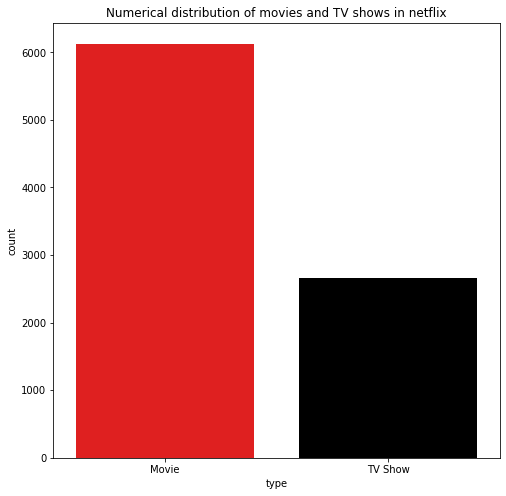

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(netflix['type'], palette= ["red","black"])
plt.title('Numerical distribution of movies and TV shows in netflix') 
plt.show();

Clearly, netflix releases more movies as compared to the TV shows. Despite the number of unique tv shows being released being low compared to the movies, TV shows may be producing more contents given that the TV shows come with multiple seasons and episodes within them.

#### Checking for number of seasons for the TV shows

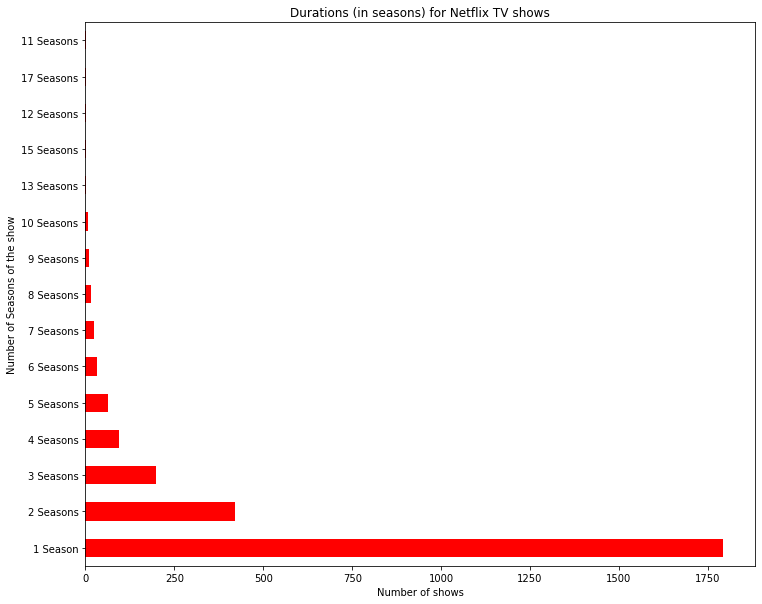

In [37]:
# plt.style.use('_mpl-gallery')
plt.figure(figsize=(12,10))
plt.title("Durations (in seasons) for Netflix TV shows")    
plt.ylabel('Number of Seasons of the show')  
plt.xlabel('Number of shows')                                      
netflix_series['duration'].value_counts().plot(kind="barh",color="red")    
plt.show()

Most of the TV shows in the datasethave not be renews for further seasons. This either tells us that most netflixt TV shows do not get watched enough to get renewed for another season, and also those that get pick up for future seasons sont make it past 4-5 seasons. TV sows more than 5 seasons are pretty rare.

Looking at the difference in volume at which the movies and TV shows are released in netflix, and analyzing the fact seasons that the TV shows renew in netflix, clearly Netflix is a popular platform to release movies than TV series.

#### Checking for pattenrs in Netflix Movies length

In [38]:
duration = []
for d in range(len(netflix_movies)):
    time = netflix_movies['duration'].iloc[d]
    duration.append(int(time.strip()[:-3]))

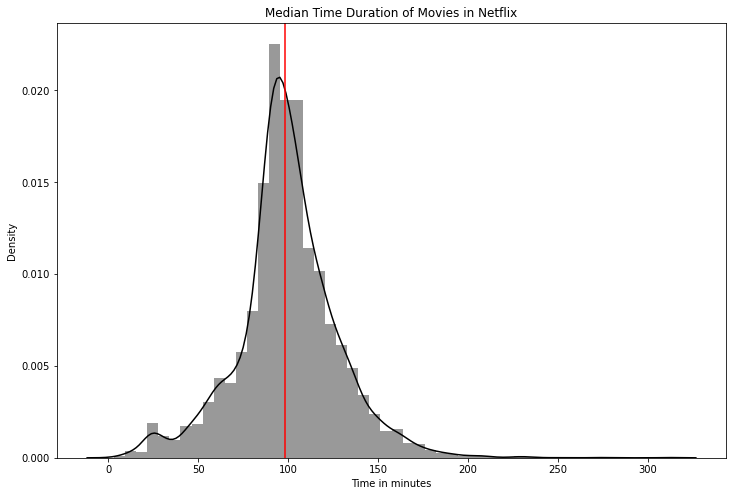

In [39]:
plt.figure(figsize=(12,8))
sns.distplot(duration, color='black');
plt.axvline(statistics.median(duration), color='red')
plt.xlabel('Time in minutes')
plt.title('Median Time Duration of Movies in Netflix');

The mean and the median for the time duration of movies are similar at approximately 100. The data is evenly distributed from the longest to shortest  movies.
A popular trend among netflix movie releases is to keep the movie run time between 1.5 hours to 2 hours.

### Distribution of Content

Let us check the distribution for the categories of movie ratings that are present in Netflix

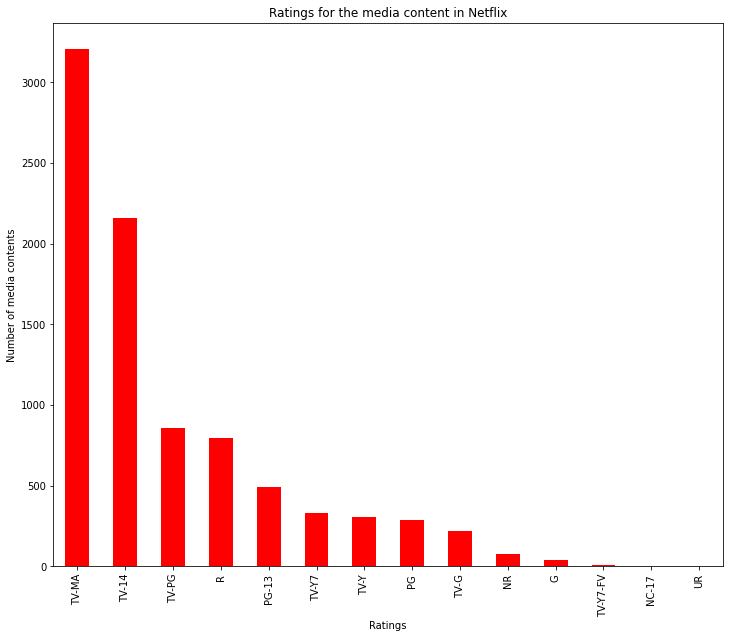

In [40]:
plt.figure(figsize=(12,10))
plt.title("Ratings for the media content in Netflix")  
plt.xlabel('Ratings')
plt.ylabel('Number of media contents')                                          
netflix['rating'].value_counts().plot(kind="bar",color="red", label="type")      
plt.show()

The overall rating for all the media that is bein stramed in Netflix shows that `TV-MA : Mature Audience Only`;  contents are the most widely streamed. Followed by `TV-14` which are the shows may be unsuitable for children under 14. Looking at the data trend Netflix seems to be favourite platforms for creators of mature content. This also goes onto reveal that most frequent users of netflix are adults (also young adults) who indulge in these contents making them more popular in the streaming platform.

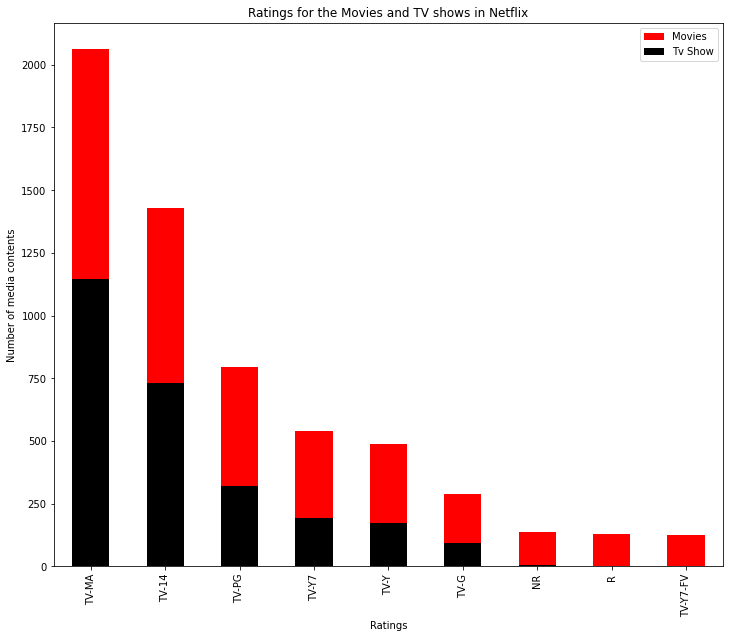

In [41]:
plt.figure(figsize=(12,10))

plt.xlabel('Ratings')
plt.ylabel('Number of media contents')
 

plt.title('Ratings for the Movies and TV shows in Netflix')
netflix_movies['rating'].value_counts().plot(kind="bar",color="red", label="type")  
netflix_series['rating'].value_counts().plot(kind="bar",color="black", label="type")  

plt.legend(["Movies", "Tv Show"])
plt.show()

For every TV show in the Mature Audiance content, there are twice the number of movies. R-rated content are almost exclusive to the movies in Netflix. Since the TV shows are lower in number than the movies the comparison may not be too insightful. Regardless, We can see that the most contents made in TV and movies are catered to mature audience in netflix.

## Media content based on countries

#### Top content producers

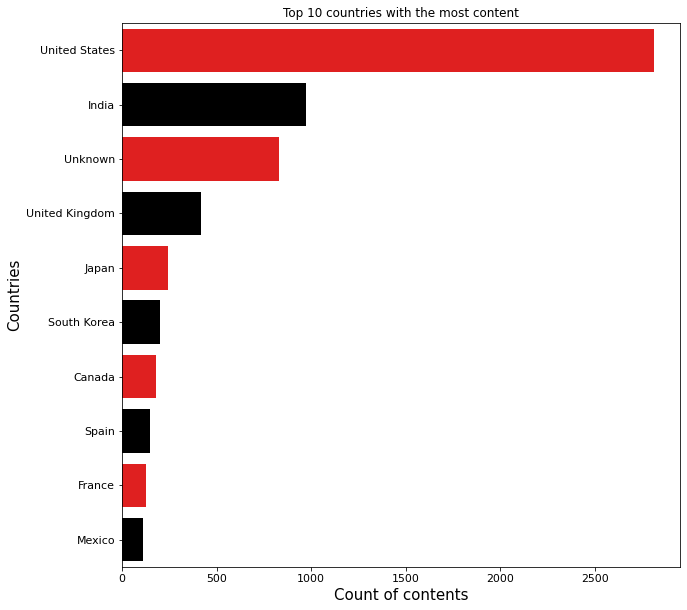

In [42]:
# Top 10 countries with the most content
plt.figure(figsize=(10, 10))
sns.countplot(y=netflix['country'], order=netflix['country'].value_counts().index[0:10], palette=['red','black'])
plt.title('Top 10 countries with the most content')
plt.xlabel('Count of contents', fontsize=15)
plt.ylabel('Countries', fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

United states is creating the most contents overall for Netflix as of 2021. Second in race is india but it still is quite far behind in the number of content it is contributing. The rest of the countries in top 10 race have considerably less contents production in comparision to the top 2.

#### Top movie producers

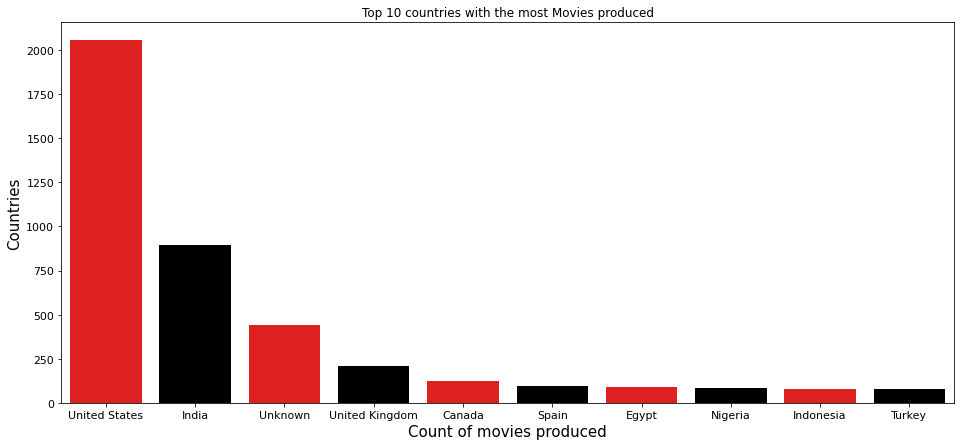

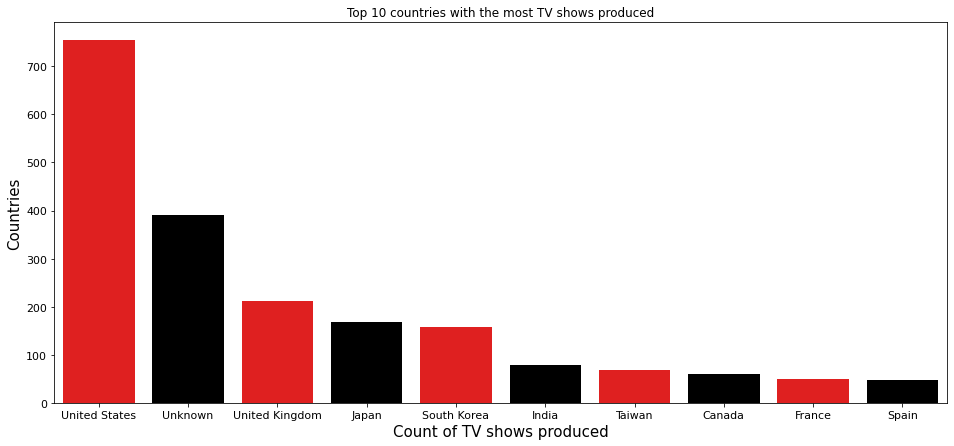

In [43]:
# Top 10 countries with the most content
plt.figure(figsize=(16, 7))
sns.countplot(x=netflix_movies['country'], order=netflix_movies['country'].value_counts().index[0:10], palette=['red','black'])
plt.title('Top 10 countries with the most Movies produced')
plt.xlabel('Count of movies produced', fontsize=15)
plt.ylabel('Countries', fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

# Top 10 countries with the most content
plt.figure(figsize=(16, 7))
sns.countplot(x=netflix_series['country'], order=netflix_series['country'].value_counts().index[0:10], palette=['red','black'])
plt.title('Top 10 countries with the most TV shows produced')
plt.xlabel('Count of TV shows produced', fontsize=15)
plt.ylabel('Countries', fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

While the overall content has different front-runners in the race, when the data is divided for the movies and series, the contributors change too.

United States remains the highest volume of content provider in both Movies and Series. While India is the close second in production of movies, United Kingdom takes the second position when it comes to series. Not all the regies that produces movies is also actively producing TV shows.

This distribution helps us understand how different countries have different focuses on movie and tv production. Netflix can target the content creators as well as its viewers based on the content it is being supplied with as well

#### Most released content(rating-wise) in top 10 countries

In [161]:
df = netflix.groupby(['country','rating']).size().reset_index(name="Count")

In [162]:
pivot = pd.pivot_table(data=df, index=['country'], columns=['rating'], values='Count')

In [164]:
pivot = pivot.fillna(0)

In [174]:
df = pivot.reset_index()
df.sample()

rating,country,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
499,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0


In [175]:
cols=[i for i in df.columns if i not in ["country"]]
for col in cols:
   df[col]=df[col].astype('int')

In [176]:
df1 = df.filter(['country','PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], axis=1)

In [200]:
netflix[netflix['country']!='Unknown']['country'].value_counts().index[0:10]

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt'],
      dtype='object')

In [201]:
#taking the top 10 countries
df_country_rating = df1[df1['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt'])]
df_country_rating

rating,country,PG-13,TV-MA,PG,TV-14,TV-PG,TV-Y,TV-Y7,R,TV-G,G,NC-17,NR,TV-Y7-FV,UR
58,Canada,3,61,8,26,22,17,9,16,14,1,1,2,1,0
150,Egypt,0,29,0,72,4,0,0,0,1,0,0,0,0,0
162,France,1,80,1,21,3,10,3,2,2,0,0,0,0,1
251,India,4,248,2,550,134,5,14,1,9,0,0,4,1,0
319,Japan,3,88,4,90,39,2,17,0,1,0,0,0,0,0
342,Mexico,1,77,0,13,6,0,3,4,2,0,0,4,0,0
435,South Korea,0,85,0,83,16,4,7,0,1,0,0,3,0,0
444,Spain,1,119,1,13,5,2,0,2,1,0,0,1,0,0
506,United Kingdom,8,176,2,72,75,19,5,33,23,0,0,5,0,0
603,United States,289,927,164,404,249,87,101,440,82,29,1,34,1,1


In [202]:
df_country_rating = df_country_rating.set_index('country')
df_country_rating = df_country_rating.reindex(index = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt'])

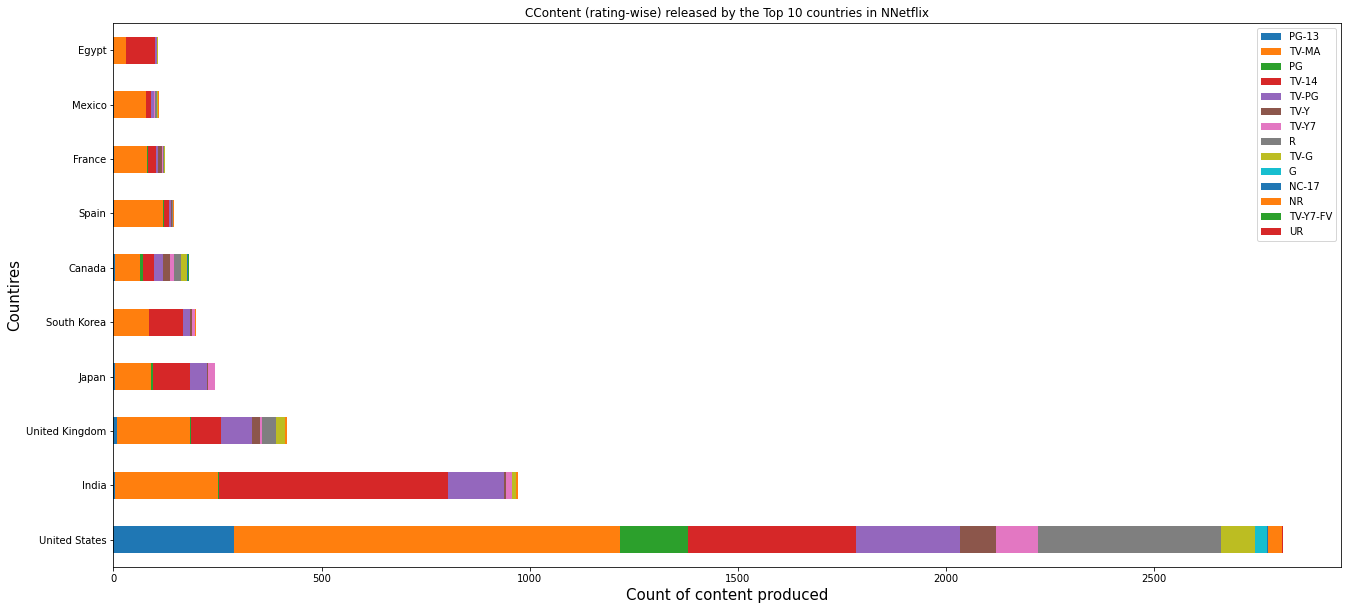

In [203]:
df_country_rating.plot(kind='barh', stacked=True, figsize=(22, 10))
plt.title('CContent (rating-wise) released by the Top 10 countries in NNetflix')
plt.xlabel('Count of content produced', fontsize=15)
plt.ylabel('Countires', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show();

As observed earlier, `TV-MA` rated contents are the most produced withing the streameing platform. The top 10 largest contributors to netflix contents allso supply the most contents to the mature/adult audiences. Based on the overall contents produced by each country, egypt seems to be catereing to yourger and wider audiences. `G-rated` movies that have no restriction in audience ages, are in negligent numbers or non existent in these countires.

Multiple things can be factored in regarding the types of contents created by each countries. More conservative countries may be producing less mature contents while, some countries may be incliend towards more cultural contents while the other countries may be targetting wider audences with even international outreach.

We can dive deeper into understand the varieties of contents produced by each countires and the percentage of retings that each contribute too. But the char above gives a pretty much clearer picture about the overall trend in the leading countries

### Breakdown based on genere

In [44]:
genere=pd.DataFrame()
genere=netflix['listed_in'].str.split(',',expand=True).stack()
genere=genere.to_frame()
genere.columns=['Genere']
genere=genere[genere.Genere !='Unknown']

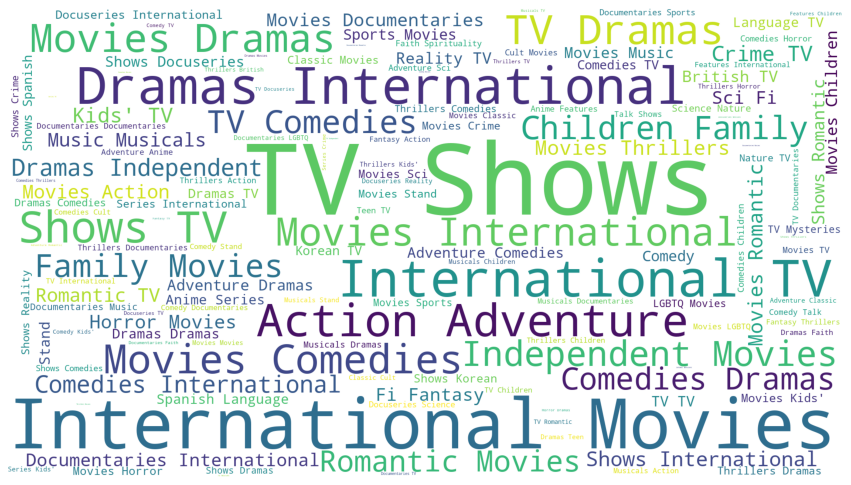

In [112]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(genere.Genere))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

With the word cloud we can oobserve the frequency with which contents of specific generes are released in Netflix. International movies and TV shows, comedies , drama, action and adventures seem to be the most commonly produced themes.

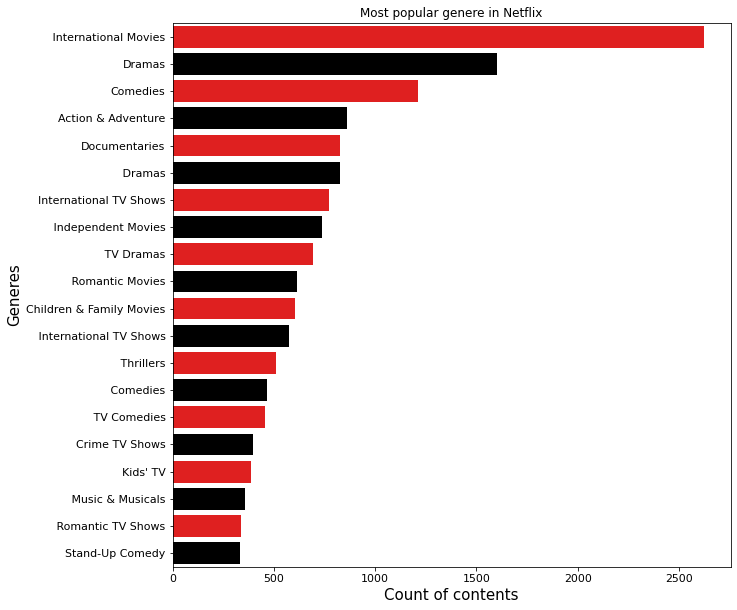

In [46]:
# Top 20 most popular generes
plt.figure(figsize=(10, 10))
sns.countplot(y=genere['Genere'], order=genere['Genere'].value_counts().index[0:20], palette=['red','black'])
plt.title('Most popular genere in Netflix')
plt.xlabel('Count of contents', fontsize=15)
plt.ylabel('Generes', fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


Looking at the most commonly adopted generes we can see that

1. International drama movies are widely accepted accorss the globe in Netflix. 
2. Comedy is another genere that is popular; be it stand up shows, or movies (domestic and international both)
3. Documentary is another widely produced content. Maybe this is also why Netflix is investing in so much them as of late.
4. Action and adventure contents too seem to have leveraged the platform to reach up to masses.

Drama and comedy seem like the most recurring theme in the platform with International movies and shows getting equal popularity everywhere. Kids and family contents are another genere that has gained popularity. Crime, Thrillers and Romance too are amongst the top 20 but aren't the most frequently published genere in Netflix as compared to otheres mentioned.

### Analysis based on Directors and Actors

#### Top 10 directors 

In [47]:
netflix.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1368,s1369,Movie,Below Zero,Lluís Quílez,"Javier Gutiérrez, Karra Elejalde, Luis Callejo...",Spain,"January 29, 2021",2021,TV-MA,107 min,"Action & Adventure, International Movies","When a prisoner transfer van is attacked, the ..."


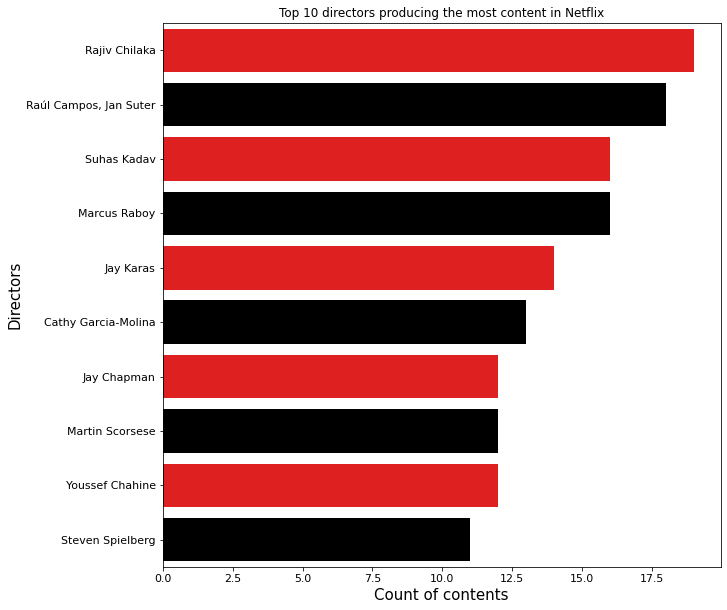

In [48]:
# Top 10 countries with the most content
plt.figure(figsize=(10, 10))
sns.countplot(y=netflix[netflix['director'] != 'Unknown']['director'], order=netflix[netflix['director'] != 'Unknown']['director'].value_counts().index[0:10], palette=['red','black'])
plt.title('Top 10 directors producing the most content in Netflix')
plt.xlabel('Count of contents', fontsize=15)
plt.ylabel('Directors', fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

#### Content ratings produced by top directors

In [144]:
df = netflix.groupby(['director','rating']).size().reset_index(name="Count")

In [145]:
pivot = pd.pivot_table(data=df, index=['director'], columns=['rating'], values='Count')

In [146]:
pivot = pivot.fillna(0)
pivot

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
director,,,,,,,,,,,,,,
A. L. Vijay,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A. Raajdheep,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A. Salaam,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.R. Murugadoss,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Aadish Keluskar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çagan Irmak,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ísold Uggadóttir,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Óskar Thór Axelsson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [147]:
df = pivot.reset_index()

In [148]:
df

rating,director,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,A. L. Vijay,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A. Raajdheep,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A. Salaam,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A.R. Murugadoss,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Aadish Keluskar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,Çagan Irmak,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4524,Ísold Uggadóttir,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4525,Óskar Thór Axelsson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4526,Ömer Faruk Sorak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [149]:
cols=[i for i in df.columns if i not in ["director"]]
for col in cols:
    df[col]=df[col].astype('int')

In [150]:
df

rating,director,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,A. L. Vijay,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1,A. Raajdheep,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,A. Salaam,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,A.R. Murugadoss,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,Aadish Keluskar,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,Çagan Irmak,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4524,Ísold Uggadóttir,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4525,Óskar Thór Axelsson,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4526,Ömer Faruk Sorak,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [151]:
netflix[netflix['director'] != 'Unknown']['director'].value_counts().index[0:10]

Index(['Rajiv Chilaka', 'Raúl Campos, Jan Suter', 'Suhas Kadav',
       'Marcus Raboy', 'Jay Karas', 'Cathy Garcia-Molina', 'Jay Chapman',
       'Martin Scorsese', 'Youssef Chahine', 'Steven Spielberg'],
      dtype='object')

In [152]:
df1 = df.filter(['director','PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], axis=1)

In [153]:
df1

rating,director,PG-13,TV-MA,PG,TV-14,TV-PG,TV-Y,TV-Y7,R,TV-G,G,NC-17,NR,TV-Y7-FV,UR
0,A. L. Vijay,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1,A. Raajdheep,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,A. Salaam,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A.R. Murugadoss,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,Aadish Keluskar,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,Çagan Irmak,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4524,Ísold Uggadóttir,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4525,Óskar Thór Axelsson,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4526,Ömer Faruk Sorak,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
df_director_rating = df1[df1['director'].isin(['Rajiv Chilaka', 'Raúl Campos, Jan Suter', 'Suhas Kadav',
       'Marcus Raboy', 'Jay Karas', 'Cathy Garcia-Molina', 'Jay Chapman',
       'Martin Scorsese', 'Youssef Chahine', 'Steven Spielberg'])]
df_director_rating

rating,director,PG-13,TV-MA,PG,TV-14,TV-PG,TV-Y,TV-Y7,R,TV-G,G,NC-17,NR,TV-Y7-FV,UR
685,Cathy Garcia-Molina,0,2,0,7,2,0,0,0,2,0,0,0,0,0
1787,Jay Chapman,0,10,0,1,0,0,0,0,0,0,0,1,0,0
1790,Jay Karas,0,10,0,3,0,0,0,0,1,0,0,0,0,0
2597,Marcus Raboy,0,13,0,3,0,0,0,0,0,0,0,0,0,0
2670,Martin Scorsese,0,2,2,0,0,0,0,8,0,0,0,0,0,0
3391,Rajiv Chilaka,0,0,0,0,0,2,17,0,0,0,0,0,0,0
3442,"Raúl Campos, Jan Suter",0,17,0,1,0,0,0,0,0,0,0,0,0,0
4019,Steven Spielberg,5,0,5,0,0,0,0,1,0,0,0,0,0,0
4045,Suhas Kadav,0,0,0,0,0,3,12,0,0,0,0,0,1,0
4480,Youssef Chahine,0,7,0,5,0,0,0,0,0,0,0,0,0,0


In [157]:
df_director_rating = df_director_rating.set_index('director')
df_director_rating = df_director_rating.reindex(index = ['Rajiv Chilaka', 'Raúl Campos, Jan Suter', 'Suhas Kadav',
       'Marcus Raboy', 'Jay Karas', 'Cathy Garcia-Molina', 'Jay Chapman',
       'Martin Scorsese', 'Youssef Chahine', 'Steven Spielberg'])

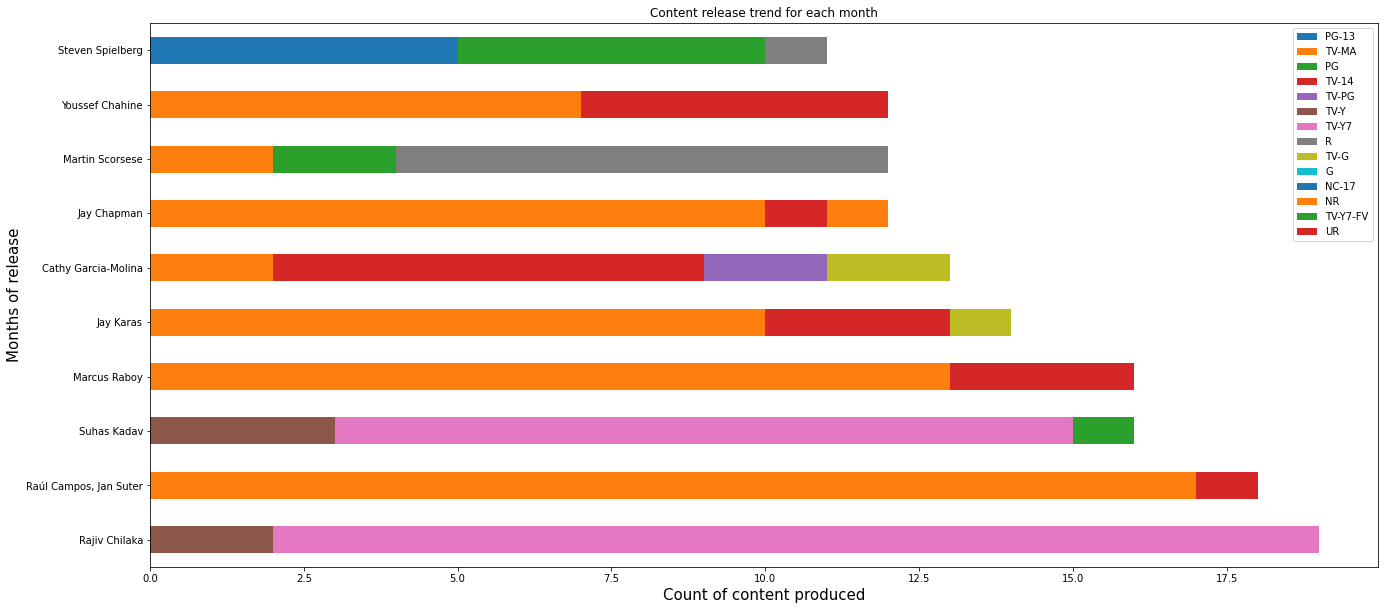

In [159]:
df_director_rating.plot(kind='barh', stacked=True, figsize=(22, 10))
plt.title('Content (rating-wise) released by the Top 10 directors in NNetflix')
plt.xlabel('Count of content produced', fontsize=15)
plt.ylabel('Directors', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show();

Without even diving too deep into the data we can clearly see tht the most commonly created contents by the top 10 directors in Netflix are `TV-MA` rated, i.e they are mostly targetted towards mature audiences. Most of the directors that produce content for mature audiences difinitey find Netflix to be an ideal platform to reach out to their audiences. `TV-14` rated content seems like the second most popular.

However the derector with the most work released in Netflix `Rajiv Chalika` and the third in the race `Suhas Kadav` have their works suitable almost entirely for the young viewers as well. So we can also say that as much as Netflix has been a favorurite platform for Mature contents, it has equally been a favourite for the content creaters targetting yournger audiences as well.

#### Top 10 actors

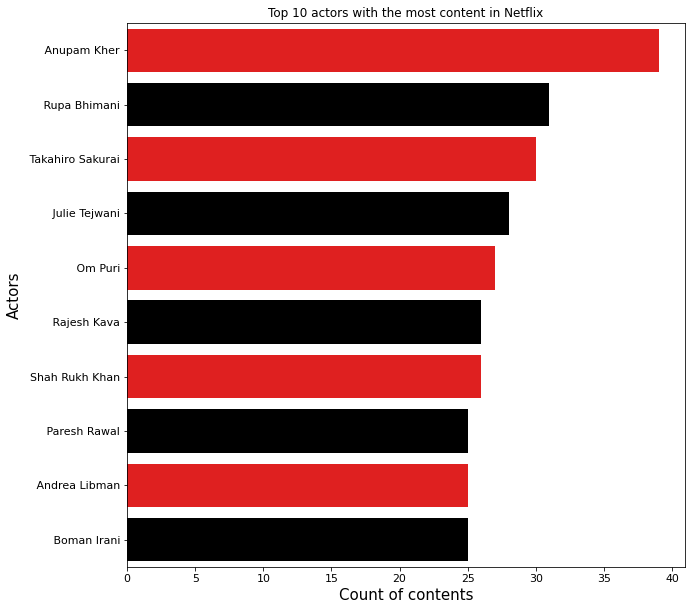

In [49]:
plt.figure(figsize=(10, 10))

cast_name=pd.DataFrame()
cast_name=netflix['cast'].str.split(',',expand=True).stack()
cast_name=cast_name.to_frame()
cast_name.columns=['Actor']
cast_name=cast_name[cast_name.Actor !='Unknown']

sns.countplot(y=cast_name['Actor'] , order=cast_name['Actor'].value_counts().index[0:10] , palette=['red','black'])
plt.title('Top 10 actors with the most content in Netflix')
plt.xlabel('Count of contents', fontsize=15)
plt.ylabel('Actors', fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


As netflix users, it is not uncommon for us to see certain directors and actors consistently working on nextflix movies and series. Looking at the data there certainly seem to be some actors and directors that seem to be fond of this platform.

There are a pretty diverse group of directors that have made it to the top 10 commonly presented creators in Netflix 

However it is interesting to see that the top 10 actors with most content in Netflix are from Bollywood. One thing that can be deciphered from this data is that Indian movie productions are more targeting towards Netflix releases making the Bollywood actors the most recurring faces in Netflix platform

### Analysis based on dates released

In [50]:
df=netflix[['type','release_year']]
df1=df.groupby(['release_year','type']).size().reset_index(name='Total Content')
df1=df1[df1['release_year']>=2010]
fig = px.line(df1, x="release_year", y="Total Content", color='type', title='Contents released over the years on Netflix')
fig.show()

The trend of releasing content in Netflix saw a sudden rise since 2014 and it reached its peak by 2017. The trend is almost similar for both TV and movies however movies seem to be cathing the wave of Netflix's popularity. The reseases see a sudden drop after 2018. Covid-19 could be the reason for this sudden drop as the production houses had to halt the releases and the entire production processes. Financial crisis as a consequences of COVID-19 could have too added up to this dip in release trend.

In [51]:
netflix_df = netflix
netflix_df['released_month'] = netflix['date_added'].str.extract('(\w+)')
netflix_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,released_month
4298,s4299,Movie,Once in a Lifetime Sessions with George Ezra,Unknown,Unknown,United States,"December 15, 2018",2018,TV-MA,78 min,"Documentaries, Music & Musicals",English singer-songwriter George Ezra performs...,December


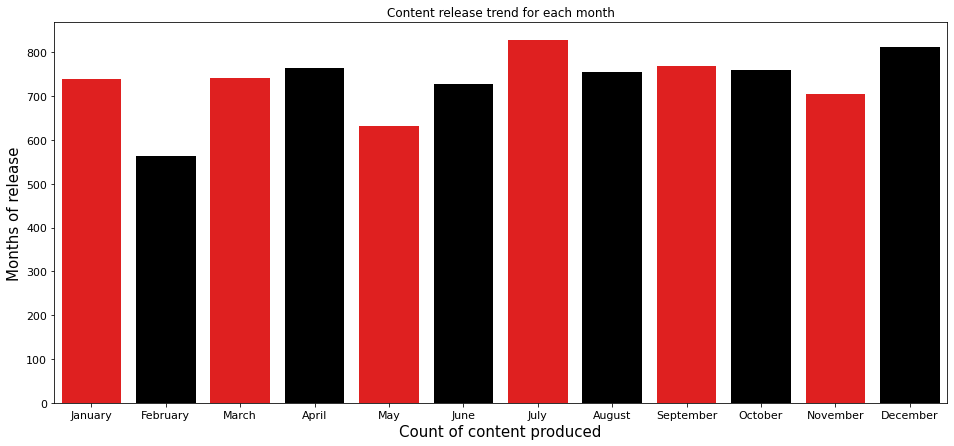

In [52]:
plt.figure(figsize=(16, 7))
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']
sns.countplot(x=netflix_df['released_month'], order=months, palette=['red','black'])
plt.title('Content release trend for each month')
plt.xlabel('Count of content produced', fontsize=15)
plt.ylabel('Months of release', fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

July and December seems to be the favourites for release of contents. The producers are propbably targetting the holiday seasons more. February is the least favourite month for releases. So this gives the producers two choices to make
1. Weather to release their product in the most popular months and ride the high waves ; these months must have been popular since it may attract more viewers.
2. Or, to release in the months where there is dearth of new releases ; first the competition is comparatively less and also viewrs might as well watch the ones that have newly released since there wont be muany new options for them.

In [53]:
df = netflix_df.groupby(['released_month','listed_in']).size().reset_index(name="Count")

In [54]:
pivot = pd.pivot_table(data=df, index=['released_month'], columns=['listed_in'], values='Count')

In [55]:
pivot = pivot.fillna(0)
pivot

listed_in,Action & Adventure,"Action & Adventure, Anime Features","Action & Adventure, Anime Features, Children & Family Movies","Action & Adventure, Anime Features, Classic Movies","Action & Adventure, Anime Features, Horror Movies","Action & Adventure, Anime Features, International Movies","Action & Adventure, Anime Features, Sci-Fi & Fantasy","Action & Adventure, Children & Family Movies","Action & Adventure, Children & Family Movies, Classic Movies","Action & Adventure, Children & Family Movies, Comedies",...,"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","TV Dramas, TV Thrillers","TV Dramas, Teen TV Shows","TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","TV Horror, TV Mysteries, TV Thrillers","TV Horror, TV Mysteries, Teen TV Shows","TV Horror, Teen TV Shows","TV Sci-Fi & Fantasy, TV Thrillers",TV Shows,Thrillers
released_month,,,,,,,,,,,,,,,,,,,,,
April,9.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,7.0
August,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
December,14.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0
February,5.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,3.0
January,16.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
July,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0
June,10.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,7.0
March,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
May,8.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0


In [56]:
df = pivot.reset_index()

In [57]:
cols=[i for i in df.columns if i not in ["released_month"]]
for col in cols:
    df[col]=df[col].astype('int')

In [58]:
df

listed_in,released_month,Action & Adventure,"Action & Adventure, Anime Features","Action & Adventure, Anime Features, Children & Family Movies","Action & Adventure, Anime Features, Classic Movies","Action & Adventure, Anime Features, Horror Movies","Action & Adventure, Anime Features, International Movies","Action & Adventure, Anime Features, Sci-Fi & Fantasy","Action & Adventure, Children & Family Movies","Action & Adventure, Children & Family Movies, Classic Movies",...,"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","TV Dramas, TV Thrillers","TV Dramas, Teen TV Shows","TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","TV Horror, TV Mysteries, TV Thrillers","TV Horror, TV Mysteries, Teen TV Shows","TV Horror, Teen TV Shows","TV Sci-Fi & Fantasy, TV Thrillers",TV Shows,Thrillers
0,April,9,0,0,0,1,2,0,0,0,...,1,2,0,0,1,1,0,0,1,7
1,August,14,1,1,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,4
2,December,14,0,0,0,0,2,0,0,0,...,0,0,0,2,0,0,0,0,2,5
3,February,5,0,1,0,0,3,0,1,0,...,0,0,0,0,0,0,2,0,3,3
4,January,16,0,1,0,0,1,0,0,3,...,0,1,0,0,0,0,0,0,1,7
5,July,11,0,0,0,0,2,0,0,1,...,0,0,1,1,0,0,0,0,1,9
6,June,10,0,1,1,0,5,1,1,0,...,0,0,0,0,1,0,0,0,3,7
7,March,11,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,May,8,0,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,6
9,November,8,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,2,3


In [59]:
netflix['listed_in'].value_counts().index[0:10]

Index(['Dramas, International Movies', 'Documentaries', 'Stand-Up Comedy',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', 'Kids' TV',
       'Children & Family Movies', 'Children & Family Movies, Comedies',
       'Documentaries, International Movies',
       'Dramas, International Movies, Romantic Movies'],
      dtype='object')

In [85]:
df1 = df.filter(['released_month', 'Dramas, International Movies', 'Documentaries', 'Stand-Up Comedy',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Children & Family Movies, Comedies',
       'Documentaries, International Movies',
       'Dramas, International Movies, Romantic Movies'], axis=1)
df1 = df1.set_index('released_month')
df1 = df1.reindex(index = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December'])

In [86]:
df1

listed_in,"Dramas, International Movies",Documentaries,Stand-Up Comedy,"Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Children & Family Movies, Comedies","Documentaries, International Movies","Dramas, International Movies, Romantic Movies"
released_month,,,,,,,,,,
January,35,26,32,20,20,29,16,22,19,6
February,18,26,22,14,25,11,6,10,18,14
March,32,27,33,22,23,21,17,16,16,26
April,34,35,24,37,19,11,23,14,15,19
May,25,35,25,23,23,17,12,17,16,11
June,36,30,21,26,16,17,13,10,14,18
July,38,37,29,24,21,22,27,20,13,17
August,27,27,30,24,15,22,9,13,12,10
September,28,37,26,16,20,27,23,19,16,15


#### Trend among released genere and months they were released in.

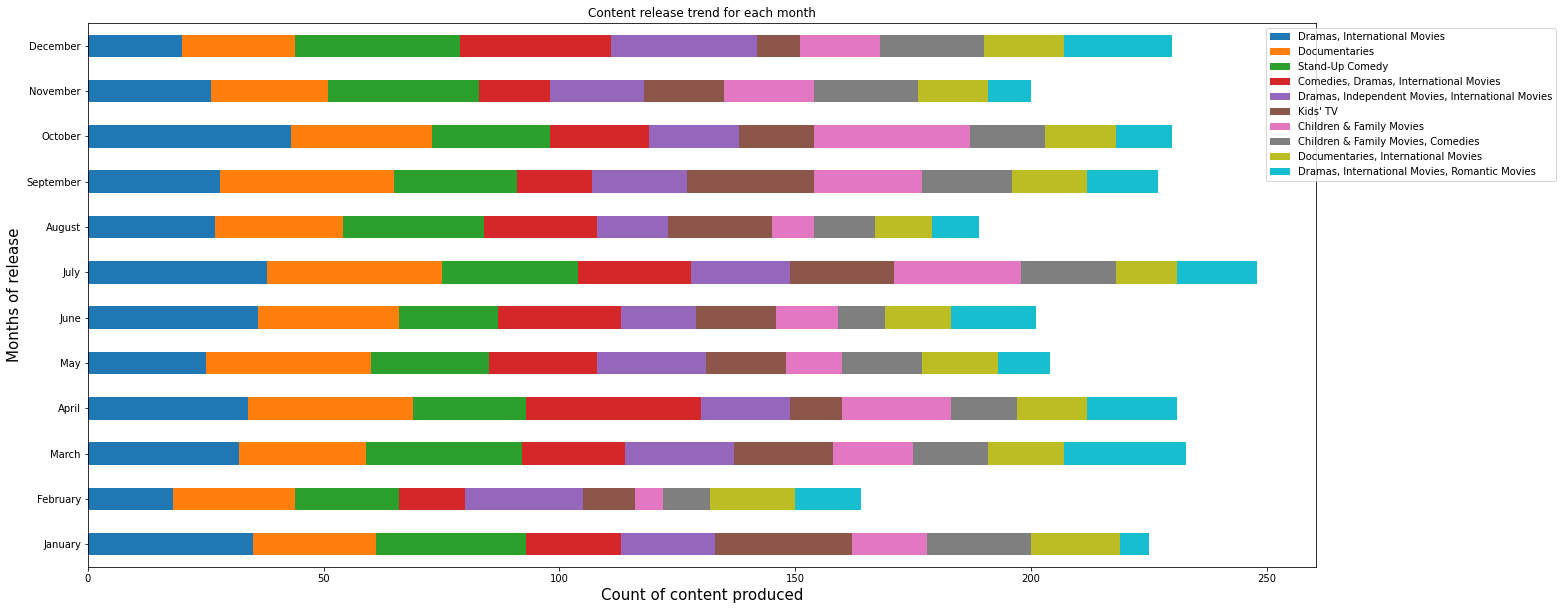

In [111]:
df1.plot(kind='barh', stacked=True, figsize=(22, 10))
plt.title('Content release trend for each month')
plt.xlabel('Count of content produced', fontsize=15)
plt.ylabel('Months of release', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show();

I wanted to check if some generes are released more in a particular motnh than the others. For isntance romantic movies in February, thrillers and horros in October and kids shows during the holidays. However there doesn't seem to be a fixed patterns in the generes that are released in particular month for us to derive a concllusion from. Specifically within the top released contents.